In [1]:
# execute to import notebook styling for tables and width etc.
from IPython.core.display import HTML
import urllib.request
# bring in needed packages
import numpy as np
import matplotlib.pyplot as plt
import babel.numbers as numbers
import seaborn as sns
import pandas as pd
from pyomo.environ import *
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
response = urllib.request.urlopen('https://raw.githubusercontent.com/DataScienceUWL/DS775v2/master/ds755.css')
HTML(response.read().decode("utf-8"));

<font size=18>Lesson 08 Homework</font>

# Textbook Problem 20.1-2

The weather can be considered a stochastic system, because it evolves in a probabilistic manner from one day to the next. Suppose for a certain location that this probabilistic series satisfies the following description:

The probability of rain tomorrow is 0.6 if it is raining today. The probability of its being clear (no rain) tomorrow is 0.8 if it is clear today.

We've modified the problem a bit from the text book:  use uniformly distributed random numbers to simulate a sequence of 1000 days starting from a clear day.  Your code should output the the approximate probability of a rainy day based on your simulation results.

<font color = "blue"> *** 6 points -  answer in cell below *** (don't delete this cell) </font>

In [2]:
# set the size of the simulation
SimSize = 1000

# initialize the array to the desired size and data type (string in this case)
np.random.seed(seed=635) #set seed
weather = np.full(shape=SimSize, fill_value="Weather") #generate probabilities
myprobs = np.full(shape=SimSize, fill_value=None) #used to check the probability value assigned to a day

# capture each simulation run using an index (i in this case)
for i in range(SimSize):
    rand = np.random.uniform(low=0.0, high=1.0, size=1)
    myprobs[i] = [rand, i] #store the probabilities for analysis
    if i == 0: #start with first day being:
        weather[i] = "clear"
    else:
        if (weather[i-1]=="clear" and rand < 0.80): #if yesterday clear and prob of today .80 then clear:
            weather[i] = "clear"
        elif (weather[i-1]=="clear" and rand >= 0.80):  #if yesterday clear and prob of today not .80 then rain:
            weather[i] = "rain"
        elif (weather[i-1]=="rain" and rand < 0.60): #if yesterday rain and prob of today .60 then rain:
            weather[i] = "rain"
        elif (weather[i-1]=="rain" and rand >= 0.60): #if yesterday rain and prob of today not .60 then clear:
            weather[i] = "clear"

# summarize the counts in a frequency table
unique_elements, counts_elements = np.unique(weather, return_counts=True)

# print the approximate probability of a rainy day (always will be the 2nd element in the array b/c we start with clear day):
print("The approximate probability of a rainy day based on a simulation size of {:0} days is {:2.2f}".format(SimSize, counts_elements[1]/SimSize))

The approximate probability of a rainy day based on a simulation size of 1000 days is 0.34


# Textbook Problem 20.6-7

Now that Jennifer is in middle school, her parents have decided that they really must start saving for her college education. They have \$10,000 to invest right now. Furthermore, they plan to save another \$4,000 each year until Jennifer starts college five years from now. They plan to split their investment evenly between a stock fund and a bond fund. Historically, the stock fund has had an average annual return of 8 percent with a standard deviation of 6 percent. The bond fund has had an average annual return of 4 percent with a standard deviation of 3 percent. (Assume a normal distribution for both.)
Assume that the initial investment (\$10,000) is made right now (year 0) and is split evenly between the two funds (i.e., \$5,000 in each fund). The returns of each fund are allowed to accumulate (i.e., are reinvested) in the same fund and no redistribution will be done before Jennifer starts college. Furthermore, four additional investments of \$4,000 will be made and split evenly between both funds (\$2,000 each) at the end of year 1, year 2, year 3, and year 4, plus another \$4,000 of savings will be available at the end of year 5, just in time for Jennifer to begin college. Use a 1000-trial simulation to estimate each of the following.

**(a)** What will be the expected value (mean) of the college fund
at the end of year 5?

**(b)** What will be the standard deviation of the college fund at the
end of year 5?

**(c)** What is the probability that the college fund at the end of year
5 will be at least \$35,000?

**(d)** What is the probability that the college fund at the end of year
5 will be at least \$40,000?

You can put all your code in one cell and print out the answers to (a)-(d) in a nicely formatted fashion please.  Your answers should be formatted as currency to the nearest $0.01.

<font color = "blue"> *** 12 points -  answer in cell below *** (don't delete this cell) </font>

In [3]:
np.random.seed(seed=1) # specify a seed to reproduce the simulation exactly
sim_size = 1000  # set number of trials in the simulation

# establish the constants in the simulation
initial_investment = 10000 #initial investment
split_stockpercent = .5 # % of stock split
eachyear = 4000 #amount each year
addlamt = 4000 #amount at end of years
years = [i for i in range(5)] #number of years
stockreturn = .08 #stock annual return
stocksd = .06 #normal
bondreturn = .04
bondsd = .03 #normal

#Create 1000 values of random numbers for each of 5 years return (can't use the same random number for each year within a simulation iteration)
rand_stock_return_year = [np.random.normal(loc=stockreturn,scale=stocksd,size=sim_size) for y in years] #stock return, normal dist (zero/negative is allowed b/c you could have losing years)
rand_bond_return_year = [np.random.normal(loc=bondreturn,scale=bondsd,size=sim_size) for y in years] #bond return, normal dist (zero/negative is allowed b/c you could have losing years)


def return_simulator(sim_size):
    totalvalue = np.zeros(sim_size)
    for i in range(sim_size):
        for year in years:
            #Hardcoding the years because this problem is specific, could adapt for other year values...
            if year == 0: #if we're in the first year
                totalstock = initial_investment * split_stockpercent #start with the initial investment % to stocks
                totalbond = initial_investment * (1-split_stockpercent) #start with the initial investment % to bonds
            elif (year > 0 and year <= 4): #if we're in subsequent years, including year 4 (4 years X $4000)
                totalstock = totalstock * (1+rand_stock_return_year[year][i]) #multiply times the year times the simulation iteration
                totalbond = totalbond * (1+rand_bond_return_year[year][i]) #multiply times the year times the simulation iteration
                totalstock += eachyear*.5 #if we do this here, it will be in there at end of year 1, with the return for year 2
                totalbond += eachyear*.5 #if we do this here, it will be in there at end of year 1, with the return for year 2
            if year == 4: #we also need to add the add'l amount after the 4th year
                totalstock += addlamt*.5 #this is the final additional amount, split evenly
                totalbond += addlamt*.5 #this is the final additional amount, split evenly
        totalvalue[i] = totalstock + totalbond
    return (totalvalue)

value = return_simulator(sim_size)

# summarize results
print("a. The mean value is",
      numbers.format_currency(np.mean(value), 'USD', locale='en_US'))
print("b. The standard deviation of the value is",
      numbers.format_currency(np.std(value), 'USD', locale='en_US'))
p35 = np.sum(value >= 35000) / sim_size #total count of simulated amounts over simsize
p40 = np.sum(value >= 40000) / sim_size #total count of simulated amounts over simsize
print("c. The probability of value at least $35k is {:0.3f}".format(p35))
print("d. The probability of value at least $40k is {:0.3f}".format(p40))

a. The mean value is $34,226.74
b. The standard deviation of the value is $1,344.11
c. The probability of value at least $35k is 0.270
d. The probability of value at least $40k is 0.000


# Textbook Problem 20.6-9

Road Pavers, Inc. (RPI) is considering bidding on a county road construction project. RPI has estimated that the cost of this particular project would be \$5 million. In addition, the cost of putting together a bid is estimated to be \$50,000. The county also will receive four other bids on the project from competitors of RPI. Past experience with these competitors suggests that each competitor’s bid is most likely to be 20 percent over the project cost of \$5 million, but could be as low as 5 percent over or as much as 40 percent over this cost. Assume a triangular distribution for each of these bids.

**(a)** Suppose that RPI bids \$5.7 million on the project. Perform 1,000 trials of a simulation. What is the probability that RPI will win the bid? What is RPI’s mean profit?

<font color = "blue"> *** 4 points -  answer in cell below *** (don't delete this cell) </font>

In [4]:
np.random.seed(seed=1) # specify a seed to reproduce the simulation exactly
SimSize = 1000
project_cost = 5000000
cost_to_bid = 50000
rpi_bid = 5700000
left = (1+.05)*project_cost
mode = (1+.20)*project_cost
right = (1+.40)*project_cost

# Generate random observations for the 4 competitors for the entire simultion
comp1 = np.random.triangular(left, mode, right, size=SimSize)
comp2 = np.random.triangular(left, mode, right, size=SimSize)
comp3 = np.random.triangular(left, mode, right, size=SimSize)
comp4 = np.random.triangular(left, mode, right, size=SimSize)

# create an array of competitor bids
compbids = np.array([comp1,comp2,comp3,comp4])
# find the min of each column, which is the lowest bid
lowestbid = np.amin(compbids,axis=0) #axis 0 goes across columns to get, for each iteration, the minimum
prob = np.sum(lowestbid >= rpi_bid) / SimSize #total count of simulated amounts where competitor is over our bid over simsize

#Work through profit calcs:
profit = np.zeros(SimSize)
for i in range(SimSize):
    win = 0
    if lowestbid[i] >= rpi_bid:
        win = 1
    #take our bid, subtract project cost but only if we win, then subtract cost to bid on all bids
    profit[i] = (rpi_bid - project_cost)*win - cost_to_bid

# summarize results
print("The probability RPI will win the bid is",
      numbers.format_decimal(prob))
print("Considering profit would either be -50000 or 650000, the mean profit is",
      numbers.format_currency(np.mean(profit), 'USD', locale='en_US'))

The probability RPI will win the bid is 0.529
Considering profit would either be -50000 or 650000, the mean profit is $320,300.00


**(b)** Generate a parameter analysis report to consider eight possible bids between \\$5.3 million and $6 million in order to forecast RPI’s mean profit for each bid. Which of these bids maximizes RPI’s mean profit?

<font color = "blue"> *** 4 points -  answer in cell below *** (don't delete this cell) </font>

In [36]:
def profit_stats(bid):
    myprob = np.sum(lowestbid >= bid) / SimSize #total count of simulated amounts where competitor is over our bid over simsize
    #Work through profit calcs:
    myprofit = np.zeros(SimSize)
    winlist = [] #for use in later problem
    for i in range(SimSize):
        win = 0
        if lowestbid[i] >= bid:
            win = 1
        #take our bid, subtract project cost but only if we win, then subtract cost to bid on all bids
        myprofit = (bid - project_cost)*win - cost_to_bid
    return(myprob, myprofit)

bid_options = np.linspace(5300000, 6000000, 8)
num_bids = len(bid_options)
prob_i = np.zeros(num_bids)
profit_i = np.zeros(num_bids)


for i in range(num_bids):
    prob_i[i], profit_i[i] = profit_stats(bid_options[i])

# put results in dataframe for nice display and plotting in next cell
df = pd.DataFrame({
    'Bid Amount': bid_options,
    'Probability of Winning': prob_i,
    'Mean Profit': profit_i
})
print('The bid that maximizes profit in the simulation:')
print()
print(df[df['Mean Profit'] == df['Mean Profit'].max()])
print()
print('Overall Simulated Outcomes:')
df

The bid that maximizes profit in the simulation:

   Bid Amount  Probability of Winning  Mean Profit
7   6000000.0                   0.107     950000.0

Overall Simulated Outcomes:


,Bid Amount,Probability of Winning,Mean Profit
0,5300000.0,0.991,250000.0
1,5400000.0,0.924,350000.0
2,5500000.0,0.819,450000.0
3,5600000.0,0.692,550000.0
4,5700000.0,0.529,650000.0
5,5800000.0,0.362,750000.0
6,5900000.0,0.198,850000.0
7,6000000.0,0.107,950000.0


**(c)** Generate a trend chart for the eight bids considered in part (b).

<font color = "blue"> *** 4 points -  answer in cell below *** (don't delete this cell) </font>

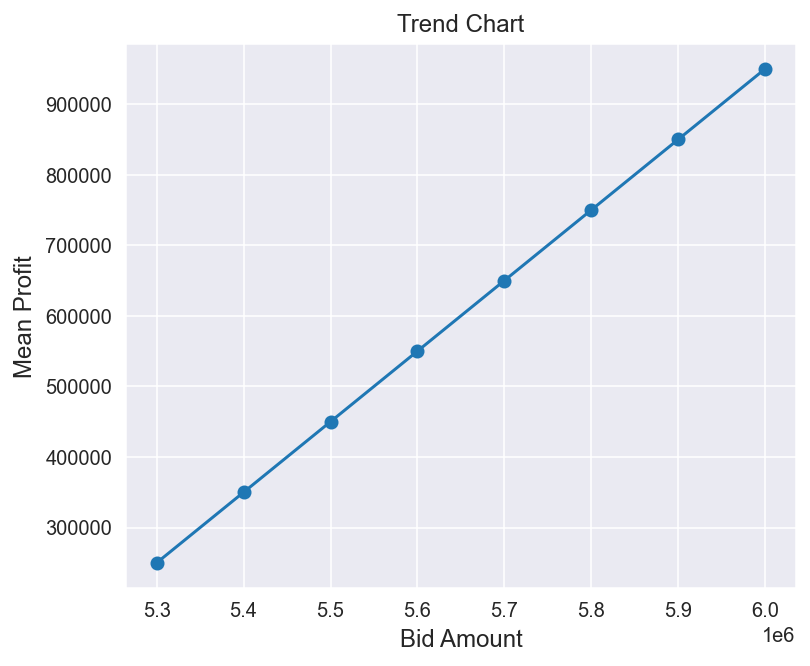

In [20]:
# plot results and trend chart showing bid amounts and mean profit
fig, ax = plt.subplots(figsize=(6, 5))
ax.plot('Bid Amount','Mean Profit',data=df, linestyle='-', marker='o');
plt.xlabel('Bid Amount', fontsize=12);
plt.ylabel('Mean Profit', fontsize=12);
plt.title("Trend Chart");

**(d)** Perform an automated search to find the bid that maximizes RPI’s mean profit. (Use one of the optimization tools we've studied.)

<font color = "blue"> *** 4 points -  answer in cell below *** (don't delete this cell) </font>

In [6]:
project_cost = 5000000
cost_to_bid = 50000
rpi_bid = 5700000
left = (1+.05)*project_cost
mode = (1+.20)*project_cost
right = (1+.40)*project_cost
    
def automated_search(seed):
    np.random.seed(seed=seed) # specify a seed to reproduce the simulation exactly
    SimSize = 1

    # Generate random observations for the 4 competitors for the entire simultion
    comp1 = np.random.triangular(left, mode, right, size=SimSize)
    comp2 = np.random.triangular(left, mode, right, size=SimSize)
    comp3 = np.random.triangular(left, mode, right, size=SimSize)
    comp4 = np.random.triangular(left, mode, right, size=SimSize)
    # create an array of competitor bids
    compbids = np.array([comp1,comp2,comp3,comp4])
    # find the min of each column, which is the lowest bid
    lowestbid = np.amin(compbids,axis=0) #axis 0 goes across columns to get, for each iteration, the minimum
    return(compbids, lowestbid)

compnames = ['Competitor1', 'Competitor2', 'Competitor3', 'Competitor4']
rounds = 1000
wins = 0
# I have this programmed to display if more than one competitor beats RPI, since that is possible
# and would be good information to have. Example is round 10, there are two lower bids.
for each in range(rounds):
    compbids, lowestbid = automated_search(each)
    indexval = 0
    if rpi_bid < lowestbid:
        print(f"Round {each+1}: RPI wins with bid of: $ {rpi_bid}.")
        wins += 1
    else:
        for bid in compbids:
            if bid < rpi_bid:
                print(f"Round {each+1}: {compnames[indexval]} wins with bid of: $ {bid}.")
            if bid == rpi_bid:
                print(f"Tie between {compnames[indexval]} and RPI with bid of: $ {bid}.")
            indexval+=1
    each += 1
#print overall probability based on simulation at amount
print()
print(f"The probability based on simulation rounds of winning at {rpi_bid} amount is: {wins/rounds}")
print()
print(f"The average profit is: ${((rpi_bid-project_cost-cost_to_bid)*wins - cost_to_bid*(rounds-wins))/rounds}")

# Sausage Making - Simulation with Optimization

We're going to revisit the Sausage Factory problem from Lessons 1 and 2, but this time, we're going to introduce uncertainty.

In Lesson 2, we optimized the cost of our sausage making, by altering the ingredients in each sausage type to meet minimum requirements and fulfill a demand of 350 economy sausages and 500 premium sausages a week.

In reality, our demand fluctuates week to week. 

The basic set up of the problem is the same.

We're going to make sausages by blending pork, wheat, and starch.  Our objective is to minimize the cost of making the sausages.  The table below shows the ingredients available, the cost, and the amount of each ingredient available from our supplier:

Ingredient | Cost ($/kg) | Amount (kg)
-----------|------|--------------
Pork       | 4.32 | 7 kg
Wheat      | 2.46 | 20.0
Starch     | 1.86 | 17



We want to make 2 types of sausage:
* Economy ( > 40\% pork )
* Premium ( > 60\% pork )

Each sausage is 50 grams (0.05 kg).  

According to government regulations, the most starch we can use in our sausages is 25\% by weight.

**New Information:**

The price for pre-purchased pork is \$3.10, for a discount of 1.12 per kg. We will be fairly conservative in our estimates of pre-purchase, and we are setting our minimum pork used to our pre-purchased amount, so we will only need to calculate the total discount in our objective, not a penalty for buying overage.  

While our demand fluctuates, we know that our demand for economy sausages is between 325 and 375 each week and our demand for premium sausage is between 450 and 550 each week. Demand appears to be uniformly distributed (use `np.random.randint`).

***This is a prescriptive analytics problem!  You are prescribing the amount of pork to buy under contract to minimize future cost in an uncertain future.***

**(a)** Write a function that takes in the amount of discount pork we will pre-purchase as a variable (x). 

Inside the function, write a 1000 iteration loop that solves the optimization problem with random variables for demand and x as your stand in for the minimum amount of discount pork produced. Track the amount of full-price pork used and the cost of each iteration and return both from your function.  

You may base your Pyomo model on either the concrete or abstract formulations in Lesson 1 and Lesson 2 presentations, respectively.

<font color = "blue"> *** 4 points -  answer in cell below *** (don't delete this cell) </font>

In [2]:
def porkprogram(x, its):
    ### Problem Data ###
    mycosts = []
    myamounts = []
    iterations = its
    economy_demand = np.random.randint(low=325, high=375, size=iterations)
    premium_demand = np.random.randint(low=450, high=550, size=iterations)
    for iters in range(iterations):
        types = ['economy','premium']
        ingredients = ['pork', 'wheat', 'starch']

        cost = dict( zip( ingredients, [4.32, 2.46, 1.86] ) )

        kg_per_sausage = 0.05
        number_each_type = dict( zip( types, [economy_demand[iters], premium_demand[iters]] ) )

        mnpi = [[.4,.6],[0,0],[0,0]]
        min_prop_ing = { ingredients[i]:{ types[j]:mnpi[i][j] for j in range(len(types)) } for i in range(len(ingredients)) }
        mxpi = [[1,1],[1,1],[.25,.25]]
        max_prop_ing = { ingredients[i]:{ types[j]:mxpi[i][j] for j in range(len(types)) } for i in range(len(ingredients)) }

        max_ingredient = dict( zip( ingredients, [30, 20, 17] ) ) #arbitrary max
        min_ingredient = dict( zip( ingredients, [x,  0,  0] ) ) #x is max

        min_prop_ing

        ### Pyomo Model ###

        # Concrete Model
        M = ConcreteModel(name = "Sausages")

        # Decision Variables
        M.amount = Var(ingredients, types, domain = NonNegativeReals)

        # Objective
        M.cost = Objective( expr = sum( cost[i] * sum(M.amount[i,t] for t in types) - 1.22*x #must subtract the discount * our minimum
                                       for i in ingredients), sense = minimize )

        M.tot_sausages_ct = ConstraintList()
        for t in types:
            M.tot_sausages_ct.add( sum( M.amount[i,t] for i in ingredients ) 
                                 == kg_per_sausage * number_each_type[t] )

        M.min_prop_ct = ConstraintList()
        for i in ingredients:
            for t in types:
                M.min_prop_ct.add( M.amount[i,t] >= min_prop_ing[i][t] *
                                 sum( M.amount[k,t] for k in ingredients ) )

        M.max_prop_ct = ConstraintList()
        for i in ingredients:
            for t in types:
                M.max_prop_ct.add( M.amount[i,t] <= max_prop_ing[i][t] * 
                                 sum( M.amount[k, t] for k in ingredients ) )

        M.max_ingredient_ct = ConstraintList()
        for i in ingredients:
            M.max_ingredient_ct.add( sum( M.amount[ i, t] for t in types ) <= 
                                   max_ingredient[i] )

        M.min_ingredient_ct = ConstraintList()
        for i in ingredients:
            M.min_ingredient_ct.add( sum( M.amount[ i, t] for t in types ) >=
                                   min_ingredient[i] )

        ### Solution ###
        solver = SolverFactory('glpk')
        solver.solve(M)
        myamounts.append(M.amount['pork','economy']() + M.amount['pork', 'premium']())
        mycosts.append(M.cost())
    return(mycosts, myamounts)


**(b)** Test your function, using 20 as your value of x. Plot histograms of the Kilograms of Full-Price Pork purchased and the cost.

<font color = "blue"> *** 4 points -  answer in cell below *** (don't delete this cell) </font>

In [3]:
#calculate:
cost, amount = porkprogram(20, 1000) #x, iterations

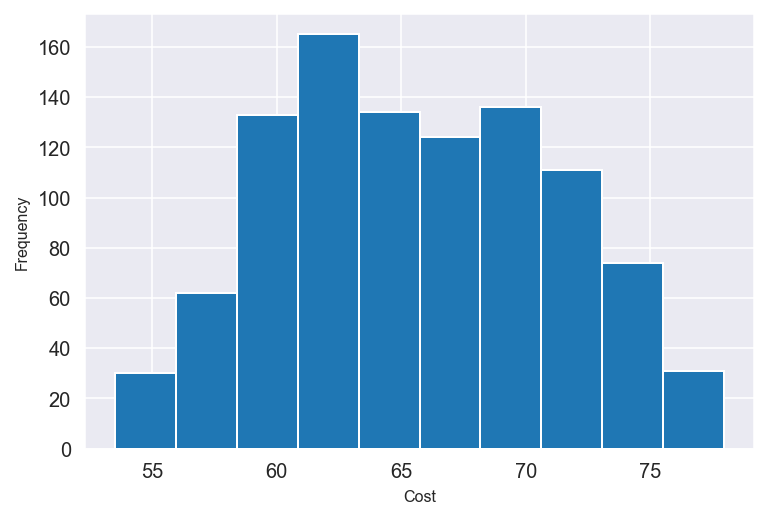

In [4]:
# display Cost in a histogram
fig, ax = plt.subplots(figsize=(6, 4));
ax.hist(cost);
plt.ylabel('Frequency', fontsize=8);
plt.xlabel('Cost', fontsize=8);

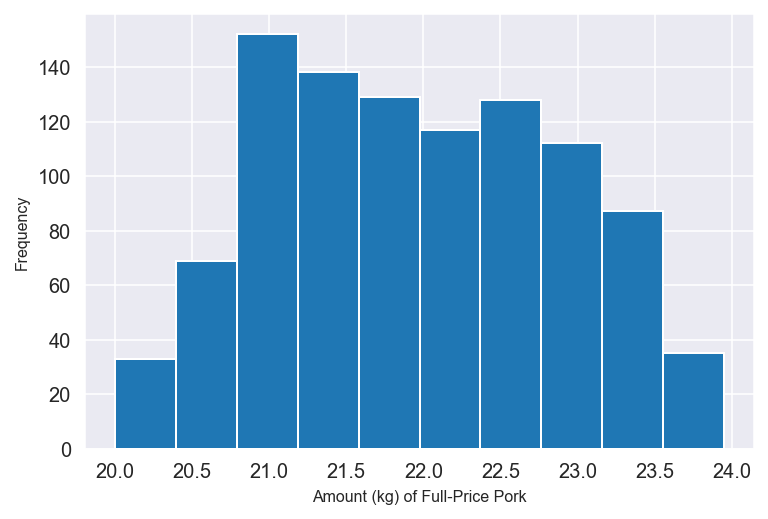

In [5]:
# display Cost in a histogram
fig, ax = plt.subplots(figsize=(6, 4));
ax.hist(amount);
plt.ylabel('Frequency', fontsize=8);
plt.xlabel('Amount (kg) of Full-Price Pork', fontsize=8);

Notice that the final cost and the amount of full-price pork purchased have distributions that fairly closely match each other. That's because full-price pork is the most expensive component of our sausages. The more full-price pork we use, the more expensive our product is. We'd like to optimize the amount of full-price pork we use.

**(c)** Write a loop to call your function for all the values of pre-order quantities between and including 17 and 28.

Store the values of:

* pre-order quantities
* the mean, 5th percentile and 95th percentile of the overage
* the mean, 5th percentile and 95th percentile of the cost.

After your loop, print the values in a dataframe.

*Note: This may take a while to run.*

<font color = "blue"> *** 4 points -  answer in cell below *** (don't delete this cell) </font>

In [52]:
preorder = range(17,29,1)
mean_overage = []
overage_05 = []
overage_95 = []
mean_cost = []
cost_05 = []
cost_95 = []
for i in preorder:
    cost, amount = porkprogram(i, 1000) #x, iterations
    overage = np.array(amount) - np.array(i)
    mean_overage.append(np.mean(overage)) #calc the overage
    [ov05, ov95] = np.quantile(overage, [.05, .95])
    overage_05.append(ov05)
    overage_95.append(ov95)
    mean_cost.append(np.mean(cost))
    [co05, co95] = np.quantile(cost, [.05, .95])
    cost_05.append(co05)
    cost_95.append(co95)
    
# put results in dataframe for nice display and plotting in next cell
df = pd.DataFrame({
    'PreorderQuantities': preorder,
    'MeanOverage': mean_overage,
    'Overage_Pctl_05': overage_05,
    'Overage_Pctl_95': overage_95,
    'MeanCost': mean_cost,
    'Cost_Pctl_05': cost_05,
    'Cost_Pctl_95': cost_95
})
df

,PreorderQuantities,MeanOverage,Overage_Pctl_05,Overage_Pctl_95,MeanCost,Cost_Pctl_05,Cost_Pctl_95
0,17,4.97275,3.4990,6.4500,76.685600,67.727670,85.659090
1,18,3.96502,2.5400,5.4105,73.011684,64.400400,81.843795
2,19,2.97996,1.5700,4.4500,69.408116,61.053270,78.188040
3,20,2.01830,0.5395,3.4705,65.989214,57.171540,74.884995
4,21,1.02037,0.0000,2.4100,62.139601,54.369000,70.675560
5,22,0.39156,0.0000,1.4205,59.269576,52.338000,67.357230
6,23,0.05006,0.0000,0.4200,56.532931,50.422500,63.444120
7,24,0.00000,0.0000,0.0000,54.906970,48.969000,60.981000
8,25,0.00000,0.0000,0.0000,53.072898,47.163225,59.181000
9,26,0.00000,0.0000,0.0000,51.202674,45.363225,57.265500


**(d)** Using the Freddie the Newsboy Simulation code, plot a trend chart that shows the overage by order quantity. 

Using the trend chart and the output from your dataframe, write a short summary explaining how much pre-purchased discount pork we should buy each week and why.

<font color = "blue"> *** 4 points -  answer in cells below *** (don't delete this cell) </font>

/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:7: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


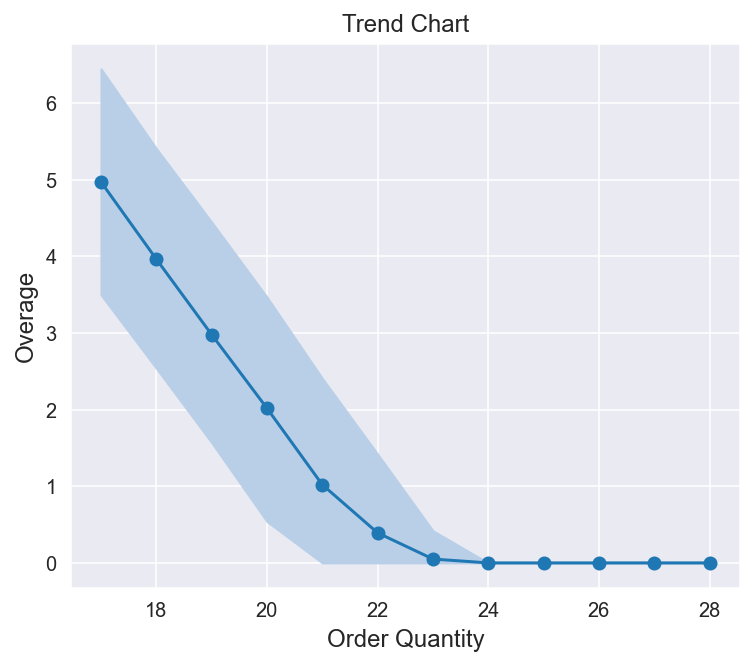

In [53]:
# plot results and trend chart showing middle 90% of simulated profits for each order quantity
fig, ax = plt.subplots(figsize=(6, 5))
ax.plot('PreorderQuantities','MeanOverage',data=df, linestyle='-', marker='o');
plt.xlabel('Order Quantity', fontsize=12);
plt.ylabel('Overage', fontsize=12);
plt.title("Trend Chart");
ax.fill_between('PreorderQuantities','Overage_Pctl_05','Overage_Pctl_95',data=df,color="#b9cfe7", edgecolor="");

Based on the analysis, we recommend pre-buying 23 kg of Pork. This amount falls right into the sweet spot of giving you potentially zero overage, but if there is overage it will be likely less than 1 kg. In addition, the mean cost is \$56.53 and can fluctuate between about \$50 and \$63.

The reason for this amount is because we want to reduce the overage but at the same time ensure we are meeting demand. By ordering 23kg, we are keeping costs low while still accounting for the variability of demand. Looking at the chart, we see between the 5th and 95th percentiles we have overage until we reach about 21 kg, where the 5th percentile drops to zero. While 21 or 22 kg would be sufficient, we want to squeeze even greater potential savings with the least amount of overage at the 95th percentile. In this way, 23 kg is more risky than 21 (could end up paying more if we're wrong), but it is going to save the most based on our simulation.